<br>
<h1 style="font-family:sans-serif; text-align:center"> 
<!--     <span style='color: pink'> Twitter analysis of </span> -->
    <span style='color: white; font-size:50%; text-shadow: 0px 0px 15px black'> Twitter analysis of </span>
<!--     <span style='color:#00acee'> Twitter analysis of </span> -->
<!--     <span style="-webkit-text-stroke"> Twitter analysis of</span> -->
<!--     <span class="hr3" style='color:#e40843; letter-spacing: 4px; font-size:105%'> Canada</span> -->
    <span class="hr3" style='color:#e40843; font-size:60%; text-shadow: 0px 0px 30px pink'>Canada </span> <span class="hr3" style='color:gray; font-size:50%; text-shadow: 0px 0px 30px pink'>response to Covid-19</span><br>
</h1>

# EDA

The aim of this notebook is to perform an Exploratory Data Analysis (EDA) to the retrieved tweets obtained using *snscrape*, from February 1st to April 30th of 2020, from Government of Canada official Twitter accounts.

_Authors: Leo Cuspinera ([cuspime](https://github.com/cuspime)) and Victor Cuspinera ([vcuspinera](https://github.com/vcuspinera))_

## Import libraries

In [296]:
# General libraries
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime, timedelta, date
from pytz import timezone
import json

# To plot
import altair as alt
alt.renderers.enable('mimetype')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Open `json` file with all tweets

In [297]:
%%time
START = time.time()

# Parameters
my_folder = "../tweets/"

# Open the file
df_tot = pd.read_json(my_folder + 'tweets_db_clean.json')

CPU times: user 12 s, sys: 2.42 s, total: 14.4 s
Wall time: 15.1 s


## Basic analysis

In [298]:
# A first view of the data frame
df_tot.tail(3)

,account,date,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location,tweet
911540,@JustinTrudeau,2020-04-30 00:00:19,1,0,0,0,en,Twitter for iPhone,pffoote,364,1535,"St. John's, NL, Canada",@rcaf_arc @cfsnowbirds @canadianforces @cfoper...
911541,@JustinTrudeau,2020-04-30 00:00:18,0,0,0,0,hi,Twitter for Android,chandan24513630,1,41,,@narendramodi @justintrudeau who बौना होगा अगर...
911542,@JustinTrudeau,2020-04-30 00:00:08,0,0,0,0,en,Twitter Web App,DavidCBarron,230,332,Brampton Ontario,@cbcnews @ctvnews @justintrudeau @celliottabil...


In [299]:
# Check if it contains the rigth tweets
%time df_tot.groupby(['account']).count()

CPU times: user 492 ms, sys: 18.6 ms, total: 510 ms
Wall time: 511 ms


,date,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location,tweet
account,,,,,,,,,,,,
@Canada,18372,18372,18372,18372,18372,18372,18372,18372,18372,18372,18372,18372
@CanadianPM,41917,41917,41917,41917,41917,41917,41917,41917,41917,41917,41917,41917
@GovCanHealth,26683,26683,26683,26683,26683,26683,26683,26683,26683,26683,26683,26683
@JustinTrudeau,824571,824571,824571,824571,824571,824571,824571,824571,824571,824571,824571,824571


In [300]:
df_tot.describe()

,replyCount,retweetCount,likeCount,quoteCount,followersCount,friendsCount
count,911543.000000,911543.000000,911543.000000,911543.000000,9.115430e+05,9.115430e+05
mean,0.715231,1.412967,5.932251,0.184725,1.006243e+04,1.214584e+03
std,14.447821,61.771017,244.651614,16.524579,2.382937e+05,4.061660e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,6.500000e+01,1.570000e+02
50%,0.000000,0.000000,0.000000,0.000000,2.980000e+02,4.860000e+02
75%,0.000000,0.000000,1.000000,0.000000,1.111000e+03,1.345000e+03
max,3817.000000,23903.000000,86779.000000,13797.000000,8.410236e+07,1.437940e+06


In [301]:
# See the number of unique terms per each variable
df_tot.nunique()

account                4
date              810348
replyCount           464
retweetCount         684
likeCount           1363
quoteCount           237
lang                  59
sourceLabel          226
username          210348
followersCount     15289
friendsCount        9052
location           43434
tweet             830865
dtype: int64

In [302]:
# tweets by `Account`
print("Number of tweets by Account:\n")
pd.DataFrame(df_tot['account'].value_counts())

Number of tweets by Account:



,account
@JustinTrudeau,824571
@CanadianPM,41917
@GovCanHealth,26683
@Canada,18372


In [303]:
# tweets by `language`
languages_twitter = pd.read_csv(my_folder + "twitter_supported_languages.csv", skiprows=5)
languages_twitter

print("Number of tweets by Languages:")
print("  -- the most used ones --\n")
data_langs = pd.DataFrame(df_tot['lang'].value_counts().head()).\
            reset_index().rename(columns={'index':'Language_code', 'lang':'tweets'})

# languages_twitter
pd.merge(languages_twitter, data_langs, how="right", on=["Language_code", "Language_code"])


Number of tweets by Languages:
  -- the most used ones --



,Language_code,Name,tweets
0,en,English (default),779670
1,und,NaN,74386
2,fr,French,32145
3,es,Spanish,10646
4,hi,Hindi,2020


## EDA plots

In [304]:
%%time

# add column with day
df_tot['day'] = [df_tot['date'][i].strftime("%Y-%m-%d") for i in range(len(df_tot))]

CPU times: user 20.7 s, sys: 77.3 ms, total: 20.8 s
Wall time: 20.9 s


### Tweets per day by account

In [305]:
# Stats
df_aux = pd.DataFrame(df_tot.groupby(['account', 'day'])['tweet'].count()).reset_index()
df_aux.groupby(['account'])['tweet'].agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
account,,,,
@Canada,90,204.133333,98,470
@CanadianPM,90,465.744444,104,1179
@GovCanHealth,90,296.477778,30,1182
@JustinTrudeau,90,9161.900000,2981,21359


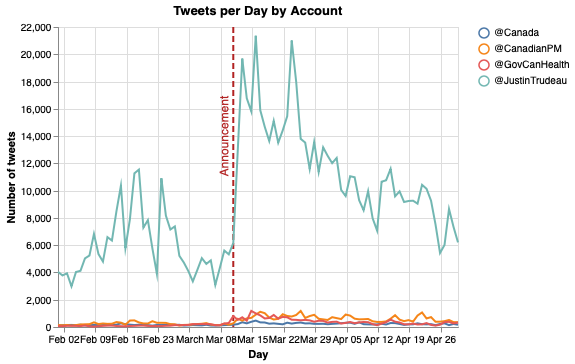

In [306]:
# Plots
base = alt.Chart(df_aux)

lines = base.mark_line().encode(
    x = alt.X('day:T', title="Day"),
    y = alt.Y('tweet:Q', title="Number of tweets"),
    color = alt.Color('account'),
    tooltip = ['account', 'tweet']
).properties(
    title='Tweets per Day by Account'
)

rule = alt.Chart(pd.DataFrame({
    'day': ['2020-03-11'],
    'color': ['firebrick']
})).mark_rule(size=2, strokeDash=[6,3]).encode(
  x='day:T',
  color=alt.Color('color:N', scale=None, title = "")
)

text = alt.Chart(pd.DataFrame({
    'day': ['2020-03-09'],
    'color': ['firebrick'],
    'y1': [14_000],
    'y2': [20_000]
})).mark_text(
    text='Announcement', angle=270, size=12
).encode(
    x='day:T', y='y1',
    color=alt.Color('color:N', scale=None, title = "")
)

rule + lines + text

When comparing the tweets per day by Canadian Government Twitter accounts, we can find that between February and April 2020, [@JustinTrudeau](https://twitter.com/JustinTrudeau) had between 3.0 and 21.4 thousand tweets per day. However, this plot doesn't allow us to identify the number of tweets for the [@Canada](https://twitter.com/Canada), [@CanadianPM](https://twitter.com/CanadianPM) and [@GovCanHealth](https://twitter.com/GovCanHealth) accounts. The best way to show the number of tweets would be using logscale in the y-axis.


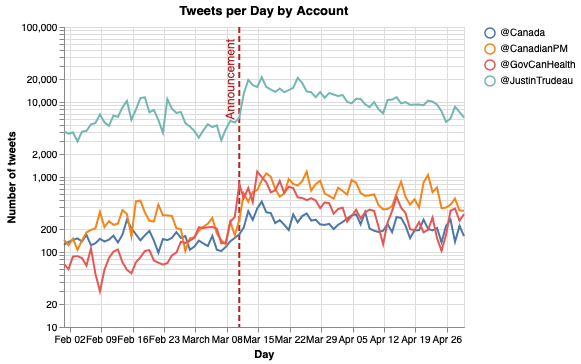

In [307]:
lines2 = lines.encode(
    y = alt.Y('tweet:Q', scale=alt.Scale(type='log'), title="Number of tweets")
)

text2 = text.encode(y='y2')

rule + lines2 + text2
# lines2

Additionally to the previous range of tweets for [@JustinTrudeau](https://twitter.com/JustinTrudeau), with the previous plot it is easier to identify the number of tweets of the other three accounts. While [@Canada](https://twitter.com/Canada) had between 98 and 470 tweets, [@CanadianPM](https://twitter.com/CanadianPM) had between 104 and 1,179 tweets, and [@GovCanHealth](https://twitter.com/GovCanHealth) had between 30 and 1,182 tweets.

Whith the previous plot we confirm our hypothesis, where we expected an increase in the number of tweets after Trudeau announcement on March 11<sup>th</sup> of 2020.

### Proportion of tweets for each Account by Language

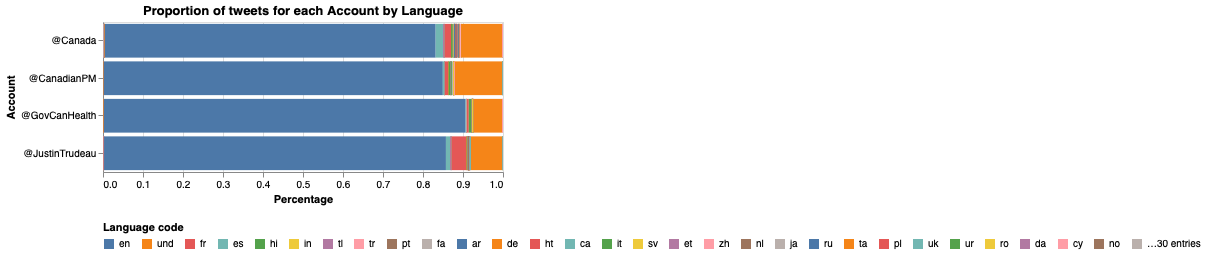

In [308]:
df_aux = pd.DataFrame(df_tot.groupby(['account', 'lang'])['tweet'].count()).reset_index()
sort_lang = pd.DataFrame(df_aux.groupby(['lang'])['tweet'].sum()).reset_index().sort_values(by=['tweet'], ascending=False).reset_index()['lang']

alt.Chart(df_aux).mark_bar().encode(
    x=alt.X('sum(tweet)', stack="normalize", title="Percentage"),
    y=alt.Y('account', title="Account"),
    color=alt.Color('lang', sort=sort_lang.to_list(), title="Language code", legend=alt.Legend(orient="bottom")),
    tooltip=['account' , 'lang']
).properties(
    title='Proportion of tweets for each Account by Language',
    height=150
)

In [309]:
# Porcentaje of 
df_aux = pd.DataFrame(df_tot.groupby(['lang'])['tweet'].count()).reset_index().sort_values(by=['tweet'], ascending=False)
df_aux['weight (%)'] = df_aux.tweet / df_aux['tweet'].sum() * 100
df_aux.head()

,lang,tweet,weight (%)
11,en,779670,85.532992
55,und,74386,8.160449
17,fr,32145,3.526438
12,es,10646,1.167910
19,hi,2020,0.221602


In [310]:
len(df_aux)

59

In this section we identify that tweets mainly in English (`en`), that represents 85.5% of all tweets. It follows a group of undefined language (`und`) with 8.2%. The third and fourth languages in the database are French (`fr`) with 3.5% and Spanish (`es`) with 1.2%

### Users with most tweets that mention/or are related with the official Canadian accounts

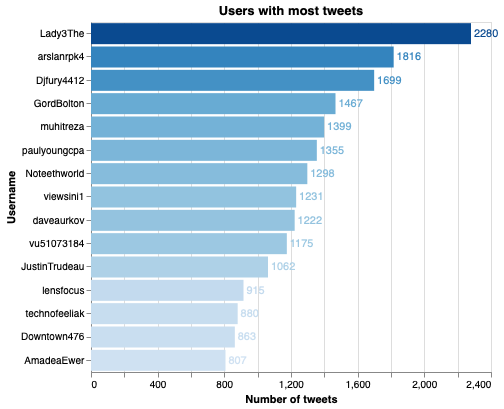

In [311]:
df_aux = pd.DataFrame(df_tot.groupby(['username'])['tweet'].count()).reset_index().sort_values(by=['tweet'], ascending=False).reset_index(drop=True)

bars = alt.Chart(df_aux[:15]).mark_bar().encode(
    x=alt.X('tweet', title="Number of tweets"),
    y=alt.Y('username', sort=list(df_aux['username'][:15]), title="Username"),
    color=alt.Color('tweet', legend=None)
).properties(
    title='Users with most tweets'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='tweet:Q'
)

(bars + text).properties(height=350)

The users with most tweets mentioning any of the four Canadian Government Twitter accounts were __Lady3The__ with 2,280 tweets; __@arslanrpk4__ with 1,816 tweets; and __Djfury4412__ with 1,699 tweets.

### Users that tweet on official Canadian twitter accouns, with most followers

In [312]:
%%time

# Dataframe of followers per user user
df_followers = df_tot[['username', 'followersCount', 'account']].reset_index(drop=True)
df_followers = df_followers.groupby(['username']).mean().reset_index().sort_values(by=['followersCount'], ascending=False).reset_index(drop=True)
df_followers['followers_M'] = df_followers['followersCount'] / 1_000_000
df_followers.drop(['followersCount'], axis=1, inplace=True)

# Dataframe of tweets per official Canada twitter accounts
df_aux = df_tot[['username', 'account']]
df_aux['counts'] = 1
df_aux = df_aux.groupby(['username', 'account']).sum().reset_index()

# merge the previous dataframes
df_aux = pd.merge(df_aux, df_followers, on='username', how='outer').sort_values(by=['followers_M'], ascending=False).reset_index(drop=True)

CPU times: user 2.29 s, sys: 176 ms, total: 2.46 s
Wall time: 2.49 s


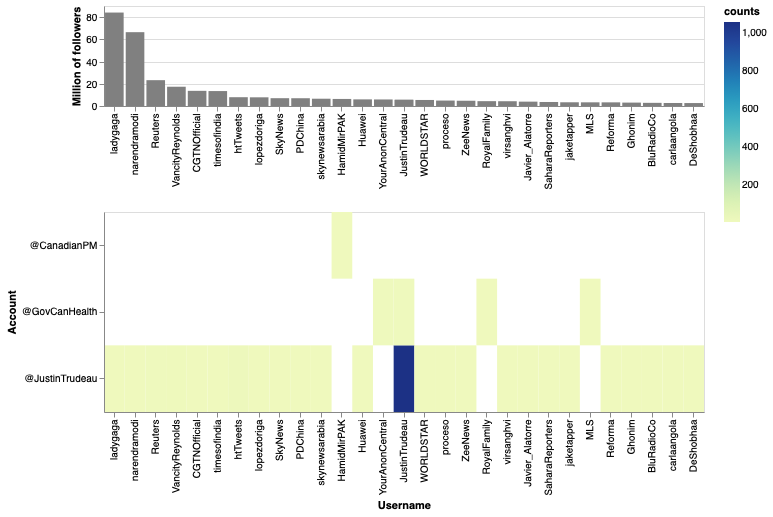

In [313]:
base = alt.Chart(df_aux.head(30)).encode(
    x=alt.X('username', sort=df_aux['username'].unique()[:1100], title='Username'),
    y=alt.Y('account', title='Account')
).properties(height=200, width=600)

top_hist = base.mark_bar(color="gray").encode(
    alt.X('username',
          sort=df_aux['username'].unique()[:1100],
          title=''
         ),
    alt.Y('followers_M', stack=None, title='Million of followers'),
    tooltip = ['username', 'followers_M']
).properties(height=100)

heat = base.mark_rect().encode(
    color='counts',
    tooltip = ['username', 'followers_M', 'counts']
)

top_hist & heat

In the previous plots we can identify the users with most followers that mention at least one Official Canadian account. Stand out users as __Lady Gaga__ ([ladygaga](https://twitter.com/ladygaga)) the pop singer with 84.1 million followers, __Narendra Modi__ ([narendramodi](https://twitter.com/narendramodi)) who is the current Prime Minister of India with 66.4 million followers, __Reuters__ ([reuters](https://twitter.com/Reuters)) that is a multinational media conglomerate with 23.2 million users, and __Ryan Reynolds__ ([VancityReynolds](https://twitter.com/VancityReynolds)) with 17.3 million users.

### Users that tweet on official Canadian twitter accouns, with most friends

In [314]:
%%time

# Dataframe of followers per user user
df_followers = df_tot[['username', 'friendsCount', 'account']].reset_index(drop=True)
df_followers = df_followers.groupby(['username']).mean().reset_index().sort_values(by=['friendsCount'], ascending=False).reset_index(drop=True)
df_followers['friends_M'] = df_followers['friendsCount'] / 1_000_000
df_followers.drop(['friendsCount'], axis=1, inplace=True)

# Dataframe of tweets per official Canada twitter accounts
df_aux = df_tot[['username', 'account']]
df_aux['counts'] = 1
df_aux = df_aux.groupby(['username', 'account']).sum().reset_index()

# merge the previous dataframes
df_aux = pd.merge(df_aux, df_followers, on='username', how='outer').sort_values(by=['friends_M'], ascending=False).reset_index(drop=True)

CPU times: user 2.36 s, sys: 135 ms, total: 2.5 s
Wall time: 2.51 s


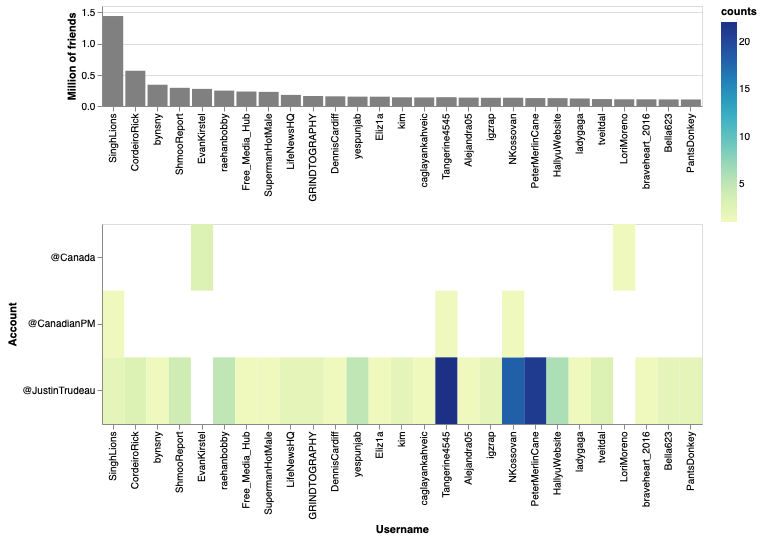

In [315]:
base = alt.Chart(df_aux.head(30)).encode(
    x=alt.X('username', sort=df_aux['username'].unique()[:1100], title='Username'),
    y=alt.Y('account', title='Account')
).properties(height=200, width=600)

top_hist = base.mark_bar(color="gray").encode(
    alt.X('username',
          sort=df_aux['username'].unique()[:1100],
          title=''
         ),
    alt.Y('friends_M', stack=None, title='Million of friends'),
    tooltip = ['username', 'friends_M']
).properties(height=100)

heat = base.mark_rect().encode(
    color='counts',
    tooltip = ['username', 'friends_M', 'counts']
)

top_hist & heat

This analysis is similar to the analysis of the previous section. In this case the users with more friends are the __Harjinder Singh Kukreja__ ([SinghLions](https://twitter.com/SinghLions)) who is a restaurateur and social activist from India with 1.44 million twitter friends, __Rick Cordeiro__ ([CordeiroRick](https://twitter.com/CordeiroRick)) who is an actor, comic and producer with 0.56 million friends, and __Larry Kelly__ ([bynsny](https://twitter.com/bynsny)) with 0.34 million friends.

### Tokens per tweet distribution

In [316]:
# count the tokens per tweets
%time tweet_size = [len(tweet) for tweet in df_tot['tweet']]

source = pd.DataFrame(tweet_size).reset_index().rename(columns = {0:"tokens", 'index': "counts"})
source = source.groupby(['tokens']).count().reset_index()

CPU times: user 187 ms, sys: 11.2 ms, total: 198 ms
Wall time: 198 ms


In [317]:
base = alt.Chart(source).mark_line().encode(
    x=alt.X("tokens:Q"),
    y=alt.Y('sum(counts)', scale=alt.Scale(type='log'), title="Count of records"),
).properties(
    title='Histogram of number of tokens by tweet'
)

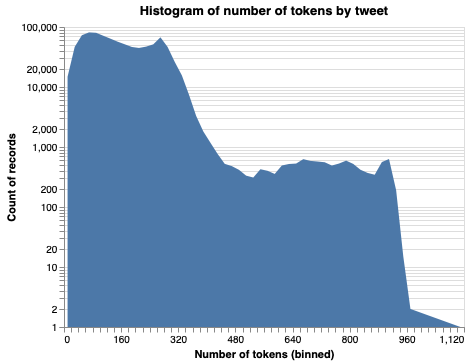

In [318]:
histo = base.mark_area().encode(x=alt.X("tokens:Q", bin=alt.Bin(maxbins=70), title="Number of tokens (binned)"))
histo

### Analysis by location

In [319]:
pd.DataFrame(df_tot.groupby(['location'])['tweet'].count())\
    .reset_index().sort_values(by=['tweet'], ascending=False).reset_index(drop=True)

,location,tweet
0,,303517
1,Canada,66052
2,"Ontario, Canada",26746
3,"Toronto, Ontario",24138
4,Toronto,12449
...,...,...
43429,Nordeste,1
43430,"Nordegg, Alberta",1
43431,"Nord-du-Québec, 52e parallèle.",1
43432,"Nord-Pas-de-Calais, France",1


The location of the tweets depends on description manually given by the user. It looks ambiguous and probably it won't be very useful for this analysis.

### Heatmaps with number of tweets

In [320]:
# wrangling data and get total
source = df_tot.groupby(['account', 'day'])['tweet'].count().reset_index() #count()
aux_tot = df_tot.groupby(['account'])['tweet'].count().reset_index().rename(columns = {'tweet': 'total'})
df_aux = pd.merge(source, aux_tot, on='account', how='left')

# get weight
df_aux['weight'] = df_aux['tweet']/df_aux['total']

In [321]:
# moving average
df_aux2 = pd.DataFrame()
for i in df_aux.account.unique():
    xxx = df_aux[df_aux.account == i][['tweet']].rolling(3, min_periods=1, center=True).mean()
    xxx['account'] = i
    df_aux2 = pd.concat([df_aux2, xxx])
df_aux2.rename(columns = {'tweet': 'mov_avg'}, inplace=True)

# get min and max of moving average
# aux_tot = pd.DataFrame()
aux = dict(dict())
for i in df_aux2.account.unique():
    aux[i] = {
        'min' : np.min(df_aux2[df_aux2.account == i]['mov_avg']),
        'max' : np.max(df_aux2[df_aux2.account == i]['mov_avg'])
    }
aux = pd.DataFrame(aux).transpose().reset_index().rename(columns={'index':'account'})
df_aux2 = pd.merge(df_aux2, aux, on='account', how='left')

# # weight the moving average
df_aux3 = pd.concat([df_aux, df_aux2[['mov_avg', 'min', 'max']]], axis=1)
df_aux3['weight_MA'] = df_aux3['mov_avg']/df_aux3['total']

# normalization
df_aux3['normal_MA'] = (df_aux3['mov_avg']-df_aux3['min']) / (df_aux3['max'] - df_aux3['min'])

df_aux3.head()

,account,day,tweet,total,weight,mov_avg,min,max,weight_MA,normal_MA
0,@Canada,2020-02-01,125,18372,0.006804,130.500000,109.0,397.0,0.007103,0.074653
1,@Canada,2020-02-02,136,18372,0.007403,135.333333,109.0,397.0,0.007366,0.091435
2,@Canada,2020-02-03,145,18372,0.007892,144.333333,109.0,397.0,0.007856,0.122685
3,@Canada,2020-02-04,152,18372,0.008273,145.000000,109.0,397.0,0.007892,0.125000
4,@Canada,2020-02-05,138,18372,0.007511,153.000000,109.0,397.0,0.008328,0.152778


#### Heatmap with number of tweets per day by account

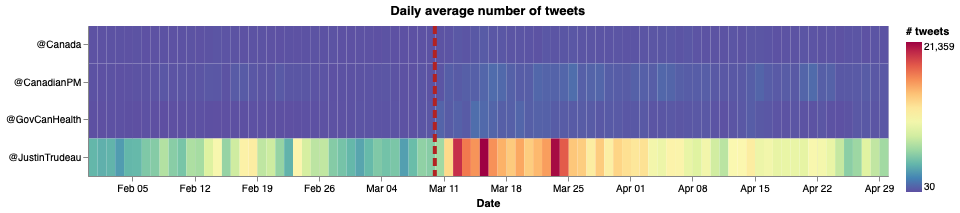

In [322]:
# heatmap color
my_scheme=alt.Scale(
            scheme="spectral",
            reverse=True
        )
# for more scheme colors go to https://vega.github.io/vega/docs/schemes/#reference

# heatmap with the number of tweets by account, per day
base = alt.Chart(df_aux3).mark_rect().encode(
    x=alt.X('monthdate(day):T', title="Date"),
    y=alt.Y('account', title=""),
    color=alt.Color('tweet:Q', title="# tweets", scale=my_scheme)
).properties(height=150, width=800)

# Line in the annoucement day: March 11th, 2020
rule = alt.Chart(pd.DataFrame({
    'day': ['2020-03-11'],
    'color': ['firebrick']
})).mark_rule(size=4, strokeDash=[8,4]).encode(
  x=alt.X('monthdate(day)'),
  color=alt.Color('color:N', title = "", scale=None)
)

(base + rule).properties(title='Daily average number of tweets')

With this heatmap we can identify the account with most tweets, which is [@JustinTrudeau](https://twitter.com/JustinTrudeau) account. However, it is not as useful for identidying the days with more tweets for the accounts [@Canada](https://twitter.com/Canada), [@CanadianPM](https://twitter.com/CanadianPM) and [@GovCanHealth](https://twitter.com/GovCanHealth).

#### Heatmap with weights of number of tweets per day by account

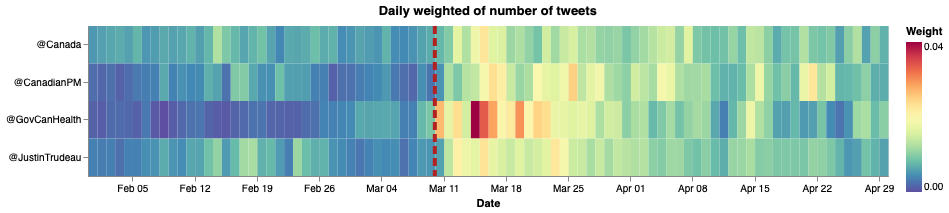

In [323]:
# use a heatmap to show the weights of number of tweets by account, per day
base_2 = base.encode(alt.Color('weight', title="Weight", scale=my_scheme))
(base_2 + rule).properties(title='Daily weighted of number of tweets')

In the previous heatmap we normalize the number of tweets by each Twitter account. With this plot, we can identify a higher number of tweets for all twitter accounts between March 11 and March 31, 2020.  

#### Heatmap with weights of Moving Averages of tweets per day by account

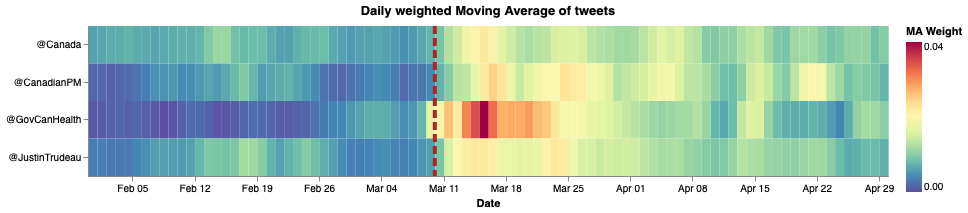

In [324]:
# use a heatmap to show the weights of moving averages of tweets by account, per day
base_2 = base.encode(alt.Color('weight_MA', title="MA Weight", scale=my_scheme))
(base_2 + rule).properties(title='Daily weighted Moving Average of tweets')

The previous plot shows the heatmap of weights using Moving Averages of number of tweets per day by each Government of Canada's Twitter account. We look for different moving averages (3, 5 and 7 days) and finally we decide to use a 7-day window which removes weekly seasonality. In this plot for the four accounts (@Canada, @CanadianPM, @GovCanHealth, and @JustinTrudeau) the proportion of tweets was lower before March 11<sup>th</sup> of 2020 and increase from this point until late March, where start decreasing the average of tweets.

#### Heatmap with Normalized Moving Averages of tweets per day by account

Finally, we also made a heatmap of the normalized Moving Averages, were we can detect the days with more tweets and less tweets, removing weekly seasonality.

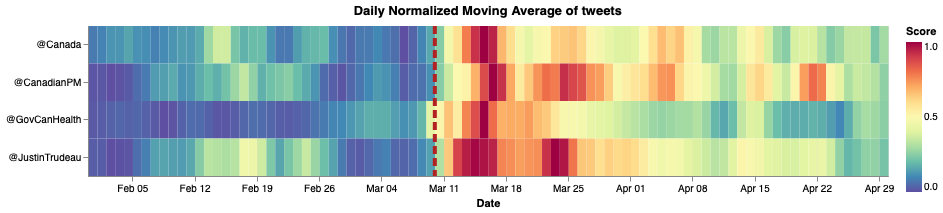

In [325]:
# use a heatmap to show the weights of moving averages of number or tweets by account, per day
base2 = base.encode(alt.Color('normal_MA', title="Score", scale=my_scheme),
                    tooltip=['account', 'monthdate(day)', 'normal_MA']
)

(base2 + rule).properties(title='Daily Normalized Moving Average of tweets')

In this plot we can identify an increase in number of tweets for all the Canadian Government's Twitter accounts around March 11<sup>th</sup>, 2020, with a peak of tweets between March 13<sup>th</sup> and 17<sup>th</sup>, decreasing from this point on until return to lower levels in mid April 2020.

### Reply, retweet, like, quote, followers and friends count by account

In [326]:
# Count information
pd.DataFrame(df_tot.groupby(['account']).sum()).reset_index()

,account,replyCount,retweetCount,likeCount,quoteCount,followersCount,friendsCount
0,@Canada,8067,16896,73361,1845,140495246,25321777
1,@CanadianPM,26889,60910,183804,7735,241585839,46298357
2,@GovCanHealth,16715,70937,129079,5716,447400330,32727008
3,@JustinTrudeau,600293,1139237,5021258,153089,8342856733,1002798429


In [327]:
# Count information per day
df_aux = pd.DataFrame(df_tot.groupby(['account', 'day']).sum()).reset_index()
df_aux

,account,day,replyCount,retweetCount,likeCount,quoteCount,followersCount,friendsCount
0,@Canada,2020-02-01,47,196,627,11,2057909,164087
1,@Canada,2020-02-02,71,359,1440,45,2109091,164300
2,@Canada,2020-02-03,46,112,469,16,2362739,243734
3,@Canada,2020-02-04,85,140,635,4,2507928,462956
4,@Canada,2020-02-05,37,117,611,4,2263523,187952
...,...,...,...,...,...,...,...,...
355,@JustinTrudeau,2020-04-26,3286,7941,27452,659,64349199,6328537
356,@JustinTrudeau,2020-04-27,4191,6767,26054,859,73211544,7645628
357,@JustinTrudeau,2020-04-28,8513,16909,146476,1223,227236456,8912199
358,@JustinTrudeau,2020-04-29,4640,5365,25510,738,87836666,7093189


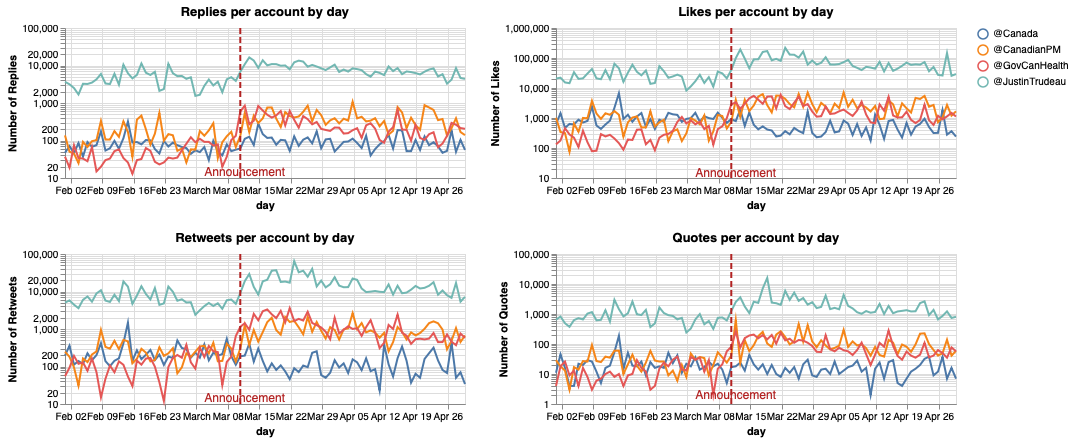

In [328]:
# Replies per account by day
base = alt.Chart(df_aux).mark_line().encode(
    x = 'day:T',
    color = 'account'
).properties(width=400, height=150)

replies = base.encode(
    y = alt.Y('replyCount', scale=alt.Scale(type='log'), title="Number of Replies"),
).properties(title='Replies per account by day')

# Retweets per account by day
retweets = base.encode(
    y = alt.Y('retweetCount', scale=alt.Scale(type='log'), title="Number of Retweets"),
).properties(title='Retweets per account by day')

# Likes per account by day
likes = base.encode(
    y = alt.Y('likeCount', scale=alt.Scale(type='log'), title="Number of Likes"),
).properties(title='Likes per account by day')

# Quotes per account by day
quotes = base.encode(
    y = alt.Y('quoteCount', scale=alt.Scale(type='log'), title="Number of Quotes"),
).properties(title='Quotes per account by day')

# announcement date
rule = alt.Chart(pd.DataFrame({
    'day': ['2020-03-11'],
    'color': ['firebrick']
})).mark_rule(size=2, strokeDash=[6,3]).encode(
  x='day:T',
  color=alt.Color('color:N', scale=None, title = "")
)

text = alt.Chart(pd.DataFrame({
    'day': ['2020-03-12'],
    'color': ['firebrick'],
    'y1': [15],
    'y2': [2]
})).mark_text(
    text='Announcement', angle=0, size=12
).encode(
    x='day:T', y='y1',
    color=alt.Color('color:N', scale=None, title = "")
)

p1 = replies + rule + text
p2 = retweets + rule + text
p3 = likes + rule + text
p4 = quotes + rule + text.encode(y='y2')

(p1 & p2) | (p3 & p4)

The four previous plots about replies, retweets, likes and quotes coincide with the previous information and plots about tweets per day by Account.

In [329]:
print("Total time to run this notebook:", np.round((time.time() - START)/60, 2), "minutes.")

Total time to run this notebook: 0.81 minutes.
